# Title :Analysis of Startup Funding in India (2018-2021)

## Project Description:
To exploration of the Indian startup funding ecosystem from 2018 to 2021 in this comprehensive project. We will get into details of the datasets, each representing a year of funding entrepreneurial activities, we aim to uncover patterns, trends, and critical insights that characterize the funding ecosystem during this transformative period.

In [1]:
import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd # For data manipulation and analysis
import numpy as np
import warnings 
from scipy import stats
import statistics as stat
import re

warnings.filterwarnings('ignore')
# Data Visualization
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file

database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('UID')
password = environment_variables.get('PWD')


# Connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:

# Establish a connection
connection = pyodbc.connect(connection_string)

## Reading data for the year 2020 and 2021 from SQL Server

In [4]:
# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.LP1_startup_funding2020"

# Read data from the SQL query result
data_2020 = pd.read_sql(query, connection)
# SQL query to fetch data from 'dbo.LP1_startup_funding2021' table
query = "Select * from dbo.LP1_startup_funding2021"

# Read data from the SQL query result
data_2021 = pd.read_sql(query, connection)

In [5]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [6]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [7]:
# Number of rows and columns for 2020
data_2020.shape

(1055, 10)

## Data Cleaning

In [8]:
# Identify missing values
print("Missing Data:")
data_2020.isnull().sum()

Missing Data:


Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [9]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [10]:
# Number of rows and columns for 2020
data_2021.shape

(1209, 9)

## Data for the year 2018 and 2019 from the CSV Files

In [11]:
# Read CSV files into DataFrames for the year 2019
data_2019 = pd.read_csv('startup_funding2019.csv')

# Read CSV files into DataFrames for the year 2018
data_2018 = pd.read_csv('startup_funding2018.csv')

In [12]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [13]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


## Performing  Hypothesis
Null Hypothesis (H0): The regional distribution of startup funding amounts remains constant across all years from 2018 to 2022.
Alternative Hypothesis (H1): There is a significant shift in the regional distribution of startup funding amounts over the years 2018 to 2022.

This hypothesis aims to investigate whether there are noticeable changes in the geographical distribution of startup funding across different regions of India over the entire dataset period. Analyzing regional patterns can provide insights into emerging startup hubs and changing investor preferences based on location.

Question 1: Has the regional distribution of startup funding amounts shown statistically significant changes from 2018 to 2022?

- This question directly addresses the alternative hypothesis by investigating whether there is evidence of a significant shift in the regional distribution of startup funding amounts over the specified years.

Question 2: Are there specific regions that have consistently dominated startup funding over the years?

- In this we analyze the distribution of funding across regions for each year,identify regions that consistently attract funding and those that may have experienced variations in their prominence.

Question 3: Are there any outlier regions that have experienced drastic changes in funding amounts, potentially driving the observed shift in the regional distribution?
- We need to Examine the  outliers or regions with significant changes in funding amounts that can provide insights into specific factors or events influencing the overall regional distribution.

Question 4: How do government policies or initiatives in specific regions correlate with changes in the regional distribution of startup funding amounts over the years?
- We aim to Explore the relationship between government policies and startup funding to reveal whether regulatory changes or supportive initiatives have influenced the observed shifts in regional funding distribution.

# Data understanding

### Data Cleaning for 2020

In [14]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [15]:
# Number of rows and columns for 2020
data_2020.shape

(1055, 10)

In [16]:
# Identify missing values
print("Missing Data:")
data_2020.isnull().sum()

Missing Data:


Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [17]:
data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [18]:
#Rename of colums 2020
data_2020.rename(columns={'What_it_does':'What it does',} , inplace=True)

In [19]:
# Drop the column10
data1= data_2020.drop('column10', axis=1)

In [20]:
# To confirm column10 is dropped
print(data1.columns)


Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')


In [21]:
# Remove missing values
data1.dropna(inplace=True)

In [22]:
data1.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [23]:
# Checking for duplicates
data1.duplicated().sum()


1

In [24]:
duplicate_rows = data1[data1.duplicated()]
duplicate_rows


,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed


In [25]:
#Drop the duplicate row
data1.drop_duplicates(inplace=True)


In [26]:
# Checking for duplicates
data1.duplicated().sum()

0

In [27]:
#checking the unique values in the amount column
amount_unique=data1['Amount'].unique()
amount_unique


array([1.0000e+05, 6.0000e+05, 4.5000e+07, 1.0000e+06, 2.0000e+06,
       7.5000e+06, 1.0000e+07, 2.1000e+07, 5.6000e+05, 4.0000e+05,
       2.7500e+05, 2.0000e+07, 1.5000e+07, 5.1000e+06, 5.0000e+05,
       2.3000e+06, 7.0000e+05, 9.0000e+06, 4.0000e+07, 1.2000e+06,
       7.5000e+05, 1.5000e+06, 7.8000e+06, 4.0000e+06, 8.0000e+07,
       4.0000e+04, 3.5000e+07, 3.0000e+06, 3.0000e+05, 2.5000e+07,
       3.5000e+06, 2.0000e+08, 7.0000e+06, 6.0000e+06, 1.3000e+06,
       8.0000e+05, 1.8000e+07, 1.0000e+08, 5.0000e+06, 9.0000e+05,
       7.5000e+07, 1.2100e+08, 2.0000e+05, 3.3000e+06, 1.1000e+07,
       4.5000e+06, 1.5000e+08, 2.2000e+07, 1.1000e+06, 4.2000e+06,
       1.7000e+06, 1.6000e+06, 5.5000e+07, 1.2000e+07, 1.3400e+07,
       1.7000e+08, 2.9000e+06, 9.0000e+07, 3.0000e+07, 3.4000e+06,
       2.3000e+07, 8.0900e+06, 1.0300e+06, 5.0400e+06, 8.0000e+06,
       1.4000e+06, 6.5000e+05, 5.4000e+07, 4.2500e+07, 2.8000e+07,
       1.1370e+07, 3.2500e+05, 4.1000e+05, 6.8200e+05, 5.0600e

In [28]:
# Number of rows and columns for 2020
data1.shape

(347, 9)

In [29]:
#Checking on the dtypes
data1_dtypes = data1.dtypes
data1_dtypes


Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

### Data Cleaning for 2021

In [30]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [31]:
# Number of rows and columns for 2020
data_2021.shape

(1209, 9)

In [32]:
# Identify missing values
print("Missing Data:")
data_2021.isnull().sum()

Missing Data:


Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [33]:
# Remove missing values
data_2021.dropna(inplace=True)

In [34]:
# Identify missing values
print("Missing Data:")
data_2021.isnull().sum()

Missing Data:


Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [35]:
# Checking for duplicates
data_2021.duplicated().sum()


12

In [36]:
duplicate_rows = data_2021[data_2021.duplicated()]
duplicate_rows


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed
248,FanAnywhere,2021.0,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",$Undisclosed,Seed
250,Spry,2021.0,Mumbai,Music,THE BEST ROYALTY-FREE MUSIC TO CREATE TRENDING...,"Gaurav Dagaonkar, Meghna Mittal","9Unicorns, Ashneer Grover",$1500000,Seed
251,Enmovil,2015.0,Hyderabad,Information Technology & Services,Enmovil delivers a Business Intelligence Platf...,"Ravi Bulusu, Nanda Kishore, Venkat Moganty",Anicut Angel Fund,$1300000,Pre-series A
252,ASQI Advisors,2019.0,Mumbai,Financial Services,Bringing Blockchain technology intro mainstrea...,Swapnil Pawar,Founders Room Capital,$1000000,Pre-series A


In [37]:
#Drop the duplicate row
data_2021.drop_duplicates(inplace=True)

In [38]:
# Checking for duplicates
data_2021.duplicated().sum()

0

In [39]:
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [40]:
#Rename of colums 2021
data_2021.rename(columns={'What_it_does':'What it does',} , inplace=True)

In [41]:
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [42]:
data1_dtypes = data_2021.dtypes
data1_dtypes


Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [43]:
#checking the unique values in the amount column
amount_unique=data_2021['Amount'].unique()
amount_unique


array(['$1,200,000', '$30,000,000', '$51,000,000', '$2,000,000',
       'Undisclosed', '$3,000,000', '$700,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$850,000', '$53,000,000', '$800,000', '$500,000', '$100,000',
       '$7,500,000', '$1,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$83,000,000', '$26,000,000', '$65,000,000', '$35,000,000',
       '$140,000,000', '$200,000', '$4,000,000', '$1,100,000', 'Upsparks',
       '$5000000', '$Undisclosed', '$200000', '$12000000', '$1500000',
       '$2000000', '$5500000', '$4000000', '$100000000', '$6000000',
       '$1000000', '$500000', '$40000000', '$225000000', '$6700000',
       '$1300000', '$20000000', '$250000', '$21000000', '$400000',
       '$8500000', '$1700000', '$3500000', '$25000000', '$3000000',
       '$37000000', '$370000000', '$700000', '$16000000', '$10000000',
       '$44000000', '$300000', '$770000'

In [44]:
# Clean up the 'Amount' column
# List of values to replace with 0
data_2021['Amount'] = data_2021['Amount'].replace('[\$,]', '', regex=True).replace(['Undisclosed','Upsparks','J0','undisclosed','ah! Ventures','ITO Angel Network LetsVenture', 'LetsVenture','JITO Angel Network'],'0', regex=True)




In [45]:
#checking the unique values in the amount column
amount_unique=data_2021['Amount'].unique()
amount_unique


array(['1200000', '30000000', '51000000', '2000000', '0', '3000000',
       '700000', '400000', '300000', '25000000', '160000000', '150000',
       '1800000', '850000', '53000000', '800000', '500000', '100000',
       '7500000', '1000000', '17000000', '3500000', '15000000',
       '215000000', '2500000', '350000000', '83000000', '26000000',
       '65000000', '35000000', '140000000', '200000', '4000000',
       '1100000', '5000000', '12000000', '1500000', '5500000',
       '100000000', '6000000', '40000000', '225000000', '6700000',
       '1300000', '20000000', '250000', '21000000', '8500000', '1700000',
       '37000000', '370000000', '16000000', '10000000', '44000000',
       '770000', '125000000', '4900000', '22000000', '13000000',
       '70000000', '7000000', '6600000', '32000000', '150000000',
       '24000000', '725000', '461000', '96000000', '60000000',
       '266000000', '4500000', '6500000', '225000', '85000000', '235000',
       '260000', '2900000', '86000000', '10000', '11

In [46]:
data1_dtypes = data_2021.dtypes
data1_dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount            object
Stage             object
dtype: object

In [47]:
#change the Amount data type from object to float
# 'coerce' option will replace any non-numeric values with NaN
data_2021['Amount'] = pd.to_numeric(data_2021['Amount'], errors='coerce')




In [48]:
data1_dtypes = data_2021.dtypes
data1_dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

In [49]:
# Display column names and data types
print("Columns and Data Types for 2020 data:")
print(data1.dtypes)

print("\nColumns and Data Types for 2021 data:")
print(data_2021.dtypes)

# Check if columns are the same
if set(data1.columns) == set(data1.columns):
    print("\nThe SQL files have the same columns.")
else:
    print("\nThe SQL files do not have the same columns.")

# Check if data types are the same
if (data1.dtypes.equals(data_2021.dtypes)):
    print("\nThe SQL files have the same data types.")
else:
    print("\nThe SQL files do not have the same data types.")


Columns and Data Types for 2020 data:
Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

Columns and Data Types for 2021 data:
Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

The SQL files have the same columns.

The SQL files have the same data types.


In [50]:
# Concatenate the data for 2020 and 2021
combined_data = pd.concat([data1, data_2021], ignore_index=True)

In [51]:
combined_data 

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage
0,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
1,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed
2,MyClassboard,2008.0,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A
3,Rupeek,2015.0,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C
4,Gig India,2017.0,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A
...,...,...,...,...,...,...,...,...,...
1071,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A
1072,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D
1073,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C
1074,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B


In [52]:
# Identify missing values
print("Missing Data:")
combined_data .isnull().sum()

Missing Data:


Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           2
Stage            0
dtype: int64

In [53]:
# Remove missing values
combined_data.dropna(inplace=True)

In [54]:
combined_data.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [55]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 0 to 1075
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1074 non-null   object 
 1   Founded        1074 non-null   float64
 2   HeadQuarter    1074 non-null   object 
 3   Sector         1074 non-null   object 
 4   What it does   1074 non-null   object 
 5   Founders       1074 non-null   object 
 6   Investor       1074 non-null   object 
 7   Amount         1074 non-null   float64
 8   Stage          1074 non-null   object 
dtypes: float64(2), object(7)
memory usage: 83.9+ KB


### Data Cleaning for 2018

In [56]:
# Read CSV files into DataFrames
data_2018 = pd.read_csv('startup_funding2018.csv')

In [57]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [58]:
# Number of rows and columns for 2018
data_2018.shape

(526, 6)

In [59]:
# Identify missing values
print("Missing Data:")
data_2018.isnull().sum()

Missing Data:


Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [60]:
# Checking for duplicates
data_2018.duplicated().sum()

1

In [61]:
duplicate_rows = data_2018[data_2018.duplicated()]
duplicate_rows

,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [62]:
#Drop the duplicate row
data_2018.drop_duplicates(inplace=True)

In [63]:
# Checking for duplicates
data_2018.duplicated().sum()

0

In [64]:
data1_dtypes = data_2018.dtypes
data1_dtypes

Company Name     object
Industry         object
Round/Series     object
Amount           object
Location         object
About Company    object
dtype: object

In [65]:
#checking the unique values in the amount column
amount_unique=data_2018['Amount'].unique()
amount_unique

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [66]:
# Clean up the 'Amount' column
# List of values to replace with 0
data_2018['Amount'] = data_2018['Amount'].replace('[\,]', '', regex=True).replace(['—'],'0', regex=True)


In [67]:
#checking the unique values in the amount column
amount_unique=data_2018['Amount'].unique()
amount_unique

array(['250000', '₹40000000', '₹65000000', '2000000', '0', '1600000',
       '₹16000000', '₹50000000', '₹100000000', '150000', '1100000',
       '₹500000', '6000000', '650000', '₹35000000', '₹64000000',
       '₹20000000', '1000000', '5000000', '4000000', '₹30000000',
       '2800000', '1700000', '1300000', '₹5000000', '₹12500000',
       '₹15000000', '500000', '₹104000000', '₹45000000', '13400000',
       '₹25000000', '₹26400000', '₹8000000', '₹60000', '9000000',
       '100000', '20000', '120000', '₹34000000', '₹342000000', '$143145',
       '₹600000000', '$742000000', '₹1000000000', '₹2000000000',
       '$3980000', '$10000', '₹100000', '₹250000000', '$1000000000',
       '$7000000', '$35000000', '₹550000000', '$28500000', '$2000000',
       '₹240000000', '₹120000000', '$2400000', '$30000000', '₹2500000000',
       '$23000000', '$150000', '$11000000', '₹44000000', '$3240000',
       '₹60000000', '$540000000', '₹650000000', '₹1600000000', '$900000',
       '$10000000', '$1500000', '₹

In [68]:

def currency_to_usd(row):
    
    # Exchange rates 1rupee = 0.012
    # Check if the amount starts with ₹
    if str(row['Amount']).startswith('₹'):
        return float(str(row['Amount']).replace('₹', '').replace(',', '')) * 0.012

    # Check if the amount starts with '$'
    elif str(row['Amount']).startswith('$'):
        return float(str(row['Amount']).replace('$', '').replace(',', ''))

    # If no currency symbol is found, assume it's in USD
    else:
        return float(str(row['Amount']).replace(',', ''))

# Apply the function to the 'Amount' column
data_2018['Amount_USD'] = data_2018.apply(currency_to_usd, axis=1)

# Display the updated DataFrame
data_2018[['Amount', 'Amount_USD']]


,Amount,Amount_USD
0,250000,250000.0
1,₹40000000,480000.0
2,₹65000000,780000.0
3,2000000,2000000.0
4,0,0.0
...,...,...
521,225000000,225000000.0
522,0,0.0
523,7500,7500.0
524,₹35000000,420000.0


In [69]:

#checking the unique values in the amount column
data_2018['Amount_USD'].unique


<bound method Series.unique of 0         250000.0
1         480000.0
2         780000.0
3        2000000.0
4              0.0
          ...     
521    225000000.0
522            0.0
523         7500.0
524       420000.0
525     35000000.0
Name: Amount_USD, Length: 525, dtype: float64>

In [70]:
# Drop the 'Amount' column
data_2018 = data_2018.drop('Amount', axis=1)

In [71]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Location', 'About Company',
       'Amount_USD'],
      dtype='object')

In [72]:
# Number of rows and columns for 2018
data_2018.shape

(525, 6)

In [73]:
#Rename of colums 2018
data_2018.rename(columns={'Industry':'Sector','Company Name':'Company_Brand','About Company':'What it does','Round/Series':'Stage','Amount_USD':'Amount','Location':'HeadQuarter'} , inplace=True)


In [74]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Sector         525 non-null    object 
 2   Stage          525 non-null    object 
 3   HeadQuarter    525 non-null    object 
 4   What it does   525 non-null    object 
 5   Amount         525 non-null    float64
dtypes: float64(1), object(5)
memory usage: 28.7+ KB


### Data Cleaning for 2019

In [75]:
data_2019 = pd.read_csv('startup_funding2019.csv')

In [76]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [77]:
# Number of rows and columns for 2019
data_2019.shape

(89, 9)

In [78]:
# Identify missing values
print("Missing Data:")
data_2019.isnull().sum()

Missing Data:


Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [79]:
# Remove missing values
data_2019.dropna(inplace=True)

In [80]:
# Identify missing values
print("Missing Data:")
data_2019.isnull().sum()

Missing Data:


Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [81]:
# Checking for duplicates
data_2019.duplicated().sum()

0

In [82]:
df = data_2019.dtypes
df

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)         object
Stage             object
dtype: object

In [83]:
#checking the unique values in the amount column
amount_unique=data_2019['Amount($)'].unique()
amount_unique

array(['$150,000,000', '$30,000,000', '$1,000,000', '$275,000,000',
       '$5,000,000', '$15,000,000', 'Undisclosed', '$1,500,000',
       '$5,500,000', '$12,000,000', '$49,400,000', '$32,000,000',
       '$150,000', '$2,000,000', '$4,000,000', '$25,000,000',
       '$70,000,000', '$60,000,000', '$2,100,000'], dtype=object)

In [84]:
# Clean up the 'Amount' column
# List of values to replace with 0
data_2019['Amount($)'] = data_2019['Amount($)'].replace('[\$,]', '', regex=True).replace(['Undisclosed'],'0', regex=True)


In [85]:
#checking the unique values in the amount column
amount_unique=data_2019['Amount($)'].unique()
amount_unique

array(['150000000', '30000000', '1000000', '275000000', '5000000',
       '15000000', '0', '1500000', '5500000', '12000000', '49400000',
       '32000000', '150000', '2000000', '4000000', '25000000', '70000000',
       '60000000', '2100000'], dtype=object)

In [86]:
# Convert 'Amount($)' column to float
data_2019['Amount($)'] = data_2019['Amount($)'].astype(float)



In [87]:
df_2019 = data_2019.dtypes
df_2019

Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
dtype: object

In [88]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 86
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  23 non-null     object 
 1   Founded        23 non-null     float64
 2   HeadQuarter    23 non-null     object 
 3   Sector         23 non-null     object 
 4   What it does   23 non-null     object 
 5   Founders       23 non-null     object 
 6   Investor       23 non-null     object 
 7   Amount($)      23 non-null     float64
 8   Stage          23 non-null     object 
dtypes: float64(2), object(7)
memory usage: 1.8+ KB


In [89]:
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [90]:
#Rename of colums 2019
data_2019.rename(columns={'Company/Brand':'Company_Brand','Round/Series':'Stage','Amount($)':'Amount'} , inplace=True)

In [91]:
data_2019 .info()
data_2018 .info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 86
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  23 non-null     object 
 1   Founded        23 non-null     float64
 2   HeadQuarter    23 non-null     object 
 3   Sector         23 non-null     object 
 4   What it does   23 non-null     object 
 5   Founders       23 non-null     object 
 6   Investor       23 non-null     object 
 7   Amount         23 non-null     float64
 8   Stage          23 non-null     object 
dtypes: float64(2), object(7)
memory usage: 1.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  525 non-null    object 
 1   Sector         525 non-null    object 
 2   Stage          525 non-null    object 
 3   HeadQuarter    525 non-null    object 
 4  

In [92]:
# Display column names and data types
print("Columns and Data Types for 2019 data:")
print(data_2019 .dtypes)

print("\nColumns and Data Types for 2018 data:")
print(data_2018 .dtypes)

# Check if columns are the same
if set(data_2019.columns) == set(data_2018.columns):
    print("\nThe CSV files have the same columns.")
else:
    print("\nThe CSV files do not have the same columns.")

# Check if data types are the same
if (data_2019.dtypes.equals(data_2018.dtypes)):
    print("\nThe CSV files have the same data types.")
else:
    print("\nThe CSV files do not have the same data types.")


Columns and Data Types for 2019 data:
Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount           float64
Stage             object
dtype: object

Columns and Data Types for 2018 data:
Company_Brand     object
Sector            object
Stage             object
HeadQuarter       object
What it does      object
Amount           float64
dtype: object

The CSV files do not have the same columns.

The CSV files do not have the same data types.


In [93]:
# Print column names for each DataFrame
print("data_2018 columns:", data_2018.columns)
print("data_2019 columns:", data_2019.columns)
print("combined_data columns:", combined_data.columns)


data_2018 columns: Index(['Company_Brand', 'Sector', 'Stage', 'HeadQuarter', 'What it does',
       'Amount'],
      dtype='object')
data_2019 columns: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')
combined_data columns: Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')


### Selecting the colums from Tables to use in dataframe

In [94]:
# Selecting columns for data_2018
df = data_2018[['Company_Brand', 'Sector', 'Stage', 'HeadQuarter', 'What it does', 'Amount']]

# Selecting columns for data_2019
df2 = data_2019[['Company_Brand', 'Sector', 'Stage', 'HeadQuarter', 'What it does', 'Amount']]

# Selecting columns for combined_data
df3 = combined_data[['Company_Brand', 'Sector', 'Stage', 'HeadQuarter', 'What it does', 'Amount']]

In [95]:
# Concatenate the datasets
Final_data= pd.concat([df,df2,df3], ignore_index=True)
Final_data.head()

,Company_Brand,Sector,Stage,HeadQuarter,What it does,Amount
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,480000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,780000.0
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,0.0


In [96]:
#Rename of Amount Column to have $ sign
Final_data.rename(columns={'Amount':'Amount($)'} , inplace=True)

### Exploratory Data Analysis (EDA)

In [97]:
Final_data.head()

,Company_Brand,Sector,Stage,HeadQuarter,What it does,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,480000.0
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,780000.0
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,0.0


### Summary statistics of numerical columns.

In [98]:
# Summary statistics

Final_data.describe()


,Amount($)
count,1.622000e+03
mean,1.704973e+07
std,5.851996e+07
min,0.000000e+00
25%,4.000000e+05
50%,2.000000e+06
75%,8.000000e+06
max,1.000000e+09


In [99]:
# Checking for  missing values
print("Missing Data:")
Final_data.isnull().sum()

Missing Data:


Company_Brand    0
Sector           0
Stage            0
HeadQuarter      0
What it does     0
Amount($)        0
dtype: int64

## Issues with the data

### Check for Inconsistent Data Entry:

In [100]:
# Display unique values in the "Stage" column
print(Final_data['Stage'].unique())

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' 'Pre series A' 'Series G' 'Seed funding' 'Series B+'
 'Pre-seed' 'Pre-series A' 'Debt' 'Pre-series C' 'Bridge' 'Series B2'
 'Pre-series B' 'Series F' 'Pre- series A' 'Edge' 'Pre-Series B' 'Seed A'
 'Series A-1' 'Seed round' 'Seed Round & Series A' 'Pre Series A'
 'Series E2' 'Seed Round' 'Pre series B' 'Pre series C' 'Series D1'
 'Mid series' 'Seed Funding' '$1200000' 'Seed+' 'Series F2' 'Series A+'
 'Series B3' 'PE' 'Series F1' 'Pre-series A1' '$300000' 'Early seed'
 'Seies A' 'Series A2' 'Pre-series' 'Series I']


In [101]:
# Standardize the "Stage" column to lowercase
Final_data['Stage'] = Final_data['Stage'].str.lower()

In [102]:
# Combine similar Seed categories
Final_data['Stage'].replace({'seed round': 'Seed', 'seed funding': 'Seed', 'seed+': 'Seed'}, inplace=True)


In [103]:
# Remove unnecessary entries
Final_data = Final_data[~Final_data['Stage'].str.contains('https://')]


In [104]:
# Display unique values in the "Stage" column after corrections
print(Final_data['Stage'].unique())

['seed' 'series a' 'angel' 'series b' 'pre-seed' 'private equity'
 'venture - series unknown' 'grant' 'debt financing' 'post-ipo debt'
 'series h' 'series c' 'series e' 'corporate round' 'undisclosed'
 'series d' 'secondary market' 'post-ipo equity' 'non-equity assistance'
 'funding round' 'pre series a' 'series g' 'Seed' 'series b+'
 'pre-series a' 'debt' 'pre-series c' 'bridge' 'series b2' 'pre-series b'
 'series f' 'pre- series a' 'edge' 'seed a' 'series a-1'
 'seed round & series a' 'series e2' 'pre series b' 'pre series c'
 'series d1' 'mid series' '$1200000' 'series f2' 'series a+' 'series b3'
 'pe' 'series f1' 'pre-series a1' '$300000' 'early seed' 'seies a'
 'series a2' 'pre-series' 'series i']


## Geographical Data:

Splitting "HeadQuarter" into City, State, and Country:

In [112]:

# Split the 'HeadQuarter' column into separate 'City', 'State', and 'Country' columns
Final_data[['City', 'State', 'Country']] = Final_data['HeadQuarter'].str.split(', ', expand=True)

# # Drop the original 'HeadQuarter' column
Final_data = Final_data.drop(columns=['HeadQuarter'])



Cleaning Geographical Data:


In [118]:
# Handling missing values
Final_data['City'].fillna('Unknown', inplace=True)
Final_data['State'].fillna('Unknown', inplace=True)
Final_data['Country'].fillna('Unknown', inplace=True)

# Convert state abbreviations to full names 
state_abbreviations = {'CA': 'California', 'NY': 'New York', 'TX': 'Texas'}

# Assuming 'State' contains state abbreviations
Final_data['State'] = Final_data['State'].replace(state_abbreviations)
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 1621
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1621 non-null   object 
 1   Sector         1621 non-null   object 
 2   Stage          1621 non-null   object 
 3   What it does   1621 non-null   object 
 4   Amount($)      1621 non-null   float64
 5   City           1621 non-null   object 
 6   State          1621 non-null   object 
 7   Country        1621 non-null   object 
dtypes: float64(1), object(7)
memory usage: 114.0+ KB


Exploring Geographical Distribution:

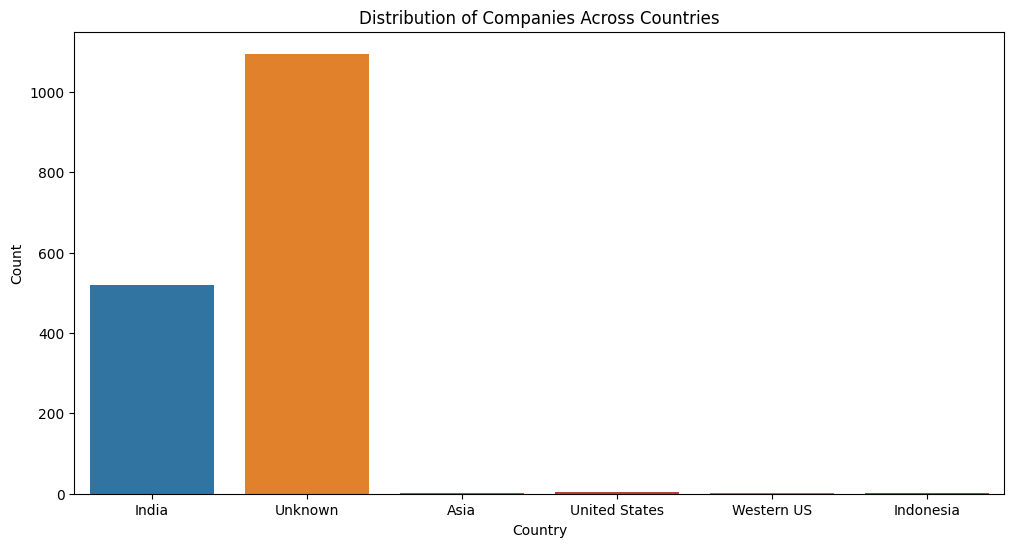

In [114]:

# Countplot of the distribution of companies across different countries
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=Final_data)
plt.title('Distribution of Companies Across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


### Distribution of categorical variables (Sector, Stage).


Text(0.5, 1.0, 'Distribution of Stages')

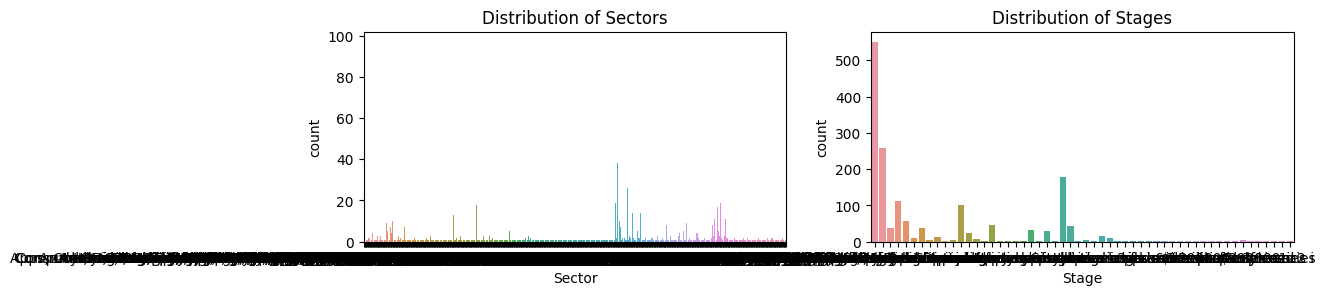

In [ ]:

# Distribution of categorical variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x="Sector", data=Final_data)
plt.title('Distribution of Sectors')

plt.subplot(2, 2, 2)
sns.countplot(x="Stage", data=Final_data)
plt.title('Distribution of Stages')





### Displaying the distribution of text length in the "What it does" column.

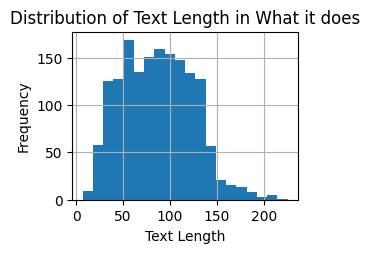

In [ ]:
# Display the What it does text
plt.subplot(2, 2, 3)
Final_data["What it does"].apply(lambda x: len(str(x))).hist(bins=20)
plt.title('Distribution of Text Length in What it does')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.show()

<Axes: >

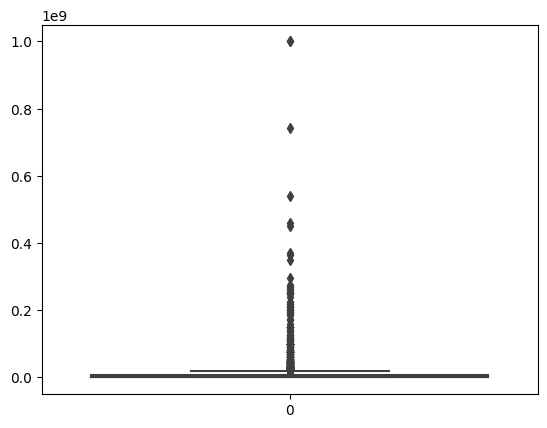

In [ ]:
#  performing Outliers using Amount column
Q1 = Final_data['Amount($)'].quantile(0.25)
Q3 = Final_data['Amount($)'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (Final_data['Amount($)'] < (Q1 - 1.5 * IQR)) | (Final_data['Amount($)'] > (Q3 + 1.5 * IQR))

# Display the outliers

sns.boxplot(Final_data['Amount($)'])


In [ ]:

# Position of the Outlier
print(np.where(Final_data['Amount($)']>0.12))

(array([   0,    1,    2, ..., 1618, 1619, 1620], dtype=int64),)


### 1.Distribution of the numerical variable (Amount) using a histogram.
### 2.Identifying outliers in the "Amount" column using a boxplot.

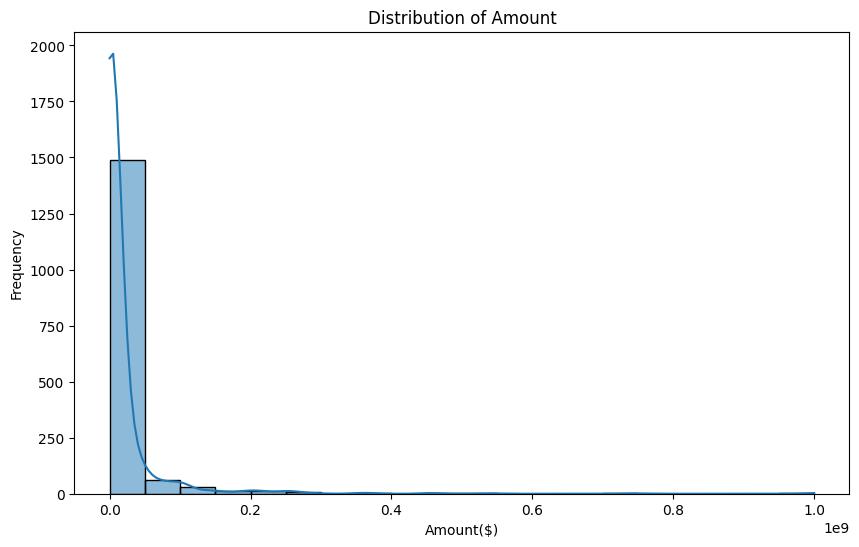

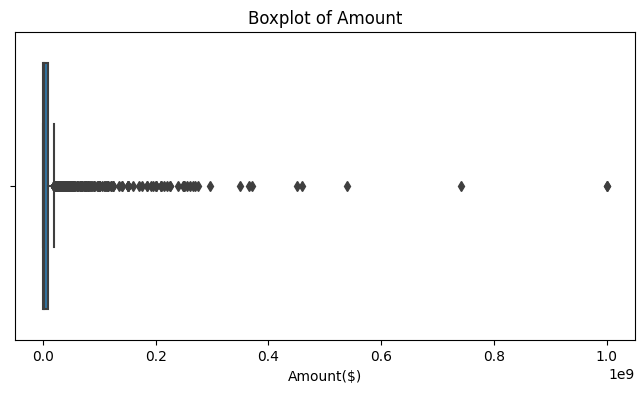

In [ ]:
# Distribution of numerical variable (Amount)
plt.figure(figsize=(10, 6))
sns.histplot(Final_data["Amount($)"], bins=20, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount($)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers in Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=Final_data["Amount($)"])
plt.title('Boxplot of Amount')
plt.show()
